# Aggregation 

Comparing the effect of aggregation (raft v0.4) vs. non-aggregation (raft v0.3) implementations.

In [22]:
%matplotlib notebook 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context("notebook")
sns.set_style("whitegrid")

In [31]:
def load_data():
    df03 = pd.read_csv("wrangled/non_aggregated_throughput.csv", index_col=0)
    df04 = pd.read_csv("wrangled/aggregated_throughput.csv", index_col=0)
    
    df = pd.concat([df03, df04])
    df["aggregation"] = df["version"].apply(lambda v: v==0.4)
    return df


df = load_data()

<IPython.core.display.Javascript object>


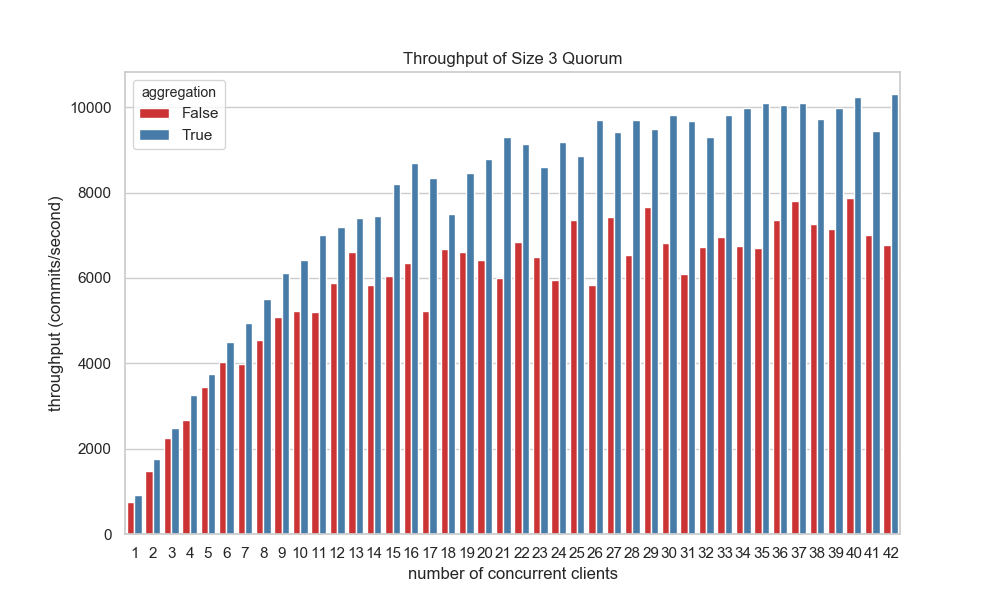

In [36]:
def plot_throughput(quorum=3, ax=None, outpath=None, df=df):
    if not ax:
        _, ax = plt.subplots(figsize=(10,6))
    
    g = sns.barplot(
        x="clients", y="throughput", hue="aggregation", estimator=lambda p: np.percentile(p, 95),
        ci=None, data=df[df["quorum"]==quorum], ax=ax, palette="Set1"
    )
    
    g.set_xlabel("number of concurrent clients")
    g.set_ylabel("throughput (commits/second)")
    g.set_title("Throughput of Size {} Quorum".format(quorum))
    
    if outpath:
        plt.savefig(outpath)
    
    return g

plot_throughput(quorum=3, outpath="raft-3-quorum-throughput.pdf")

<IPython.core.display.Javascript object>


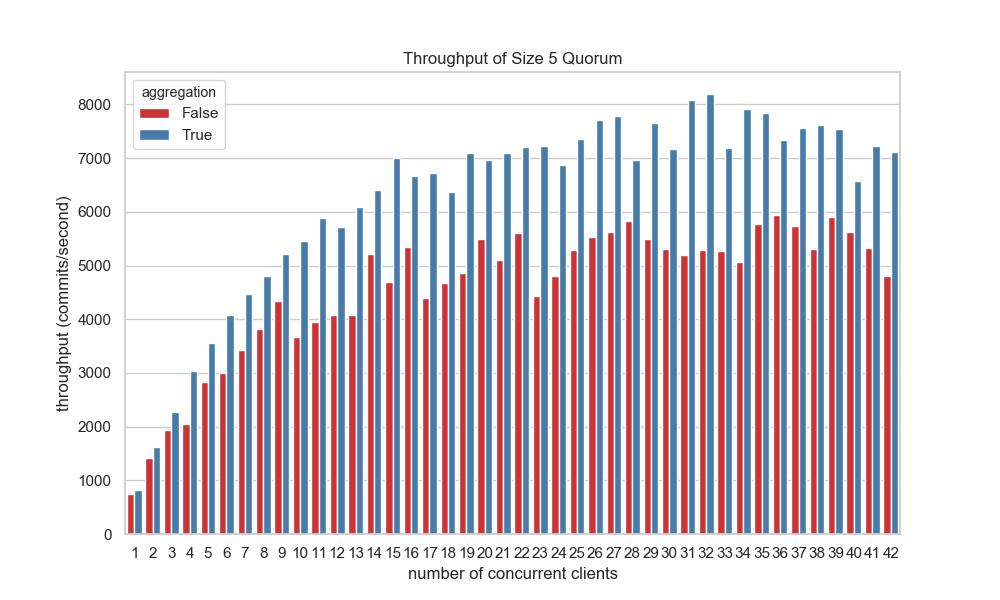

In [37]:
plot_throughput(quorum=5, outpath="raft-5-quorum-throughput.pdf")

In [41]:
df.groupby(["quorum", "version"])["throughput"].max()

quorum  version
3       0.4        10371.277196
        0.3.6       7940.077958
5       0.4         8334.329173
        0.3.6       6026.959377
Name: throughput, dtype: float64

In [43]:
(10371.277196 / 7940.077958) * 100

130.61933712565695

In [42]:
(8334.329173 / 6026.959377) * 100 

138.28414382226225